In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geopandas folium

In [ ]:

import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd


def extraer_año(nombre_archivo):
    match = re.search(r'(20\d{2})', nombre_archivo)
    return int(match.group(1)) if match else None

def cargar_archivos(ruta, columna_valor, columna_genero, columna_id_tic, valor_tic, nivel_formacion,institucion_edu_superior,codigo_departamento, departamento_oferta_programa):
    archivos = glob.glob(os.path.join(ruta, "*.xlsx"))
    lista_df = []
    for archivo in archivos:
        try:
            df = pd.read_excel(archivo, engine='openpyxl')
            año = extraer_año(os.path.basename(archivo))
            df["AÑO"] = año
            df = df[[columna_genero, columna_id_tic, columna_valor, "AÑO", 'NIVEL DE FORMACIÓN','INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES)','CÓDIGO DEL DEPARTAMENTO (PROGRAMA)','DEPARTAMENTO DE OFERTA DEL PROGRAMA']]
            df = df[df[columna_id_tic] == valor_tic]
            lista_df.append(df)
        except Exception as e:
            print(f"Error cargando {archivo}: {e}")
    return pd.concat(lista_df, ignore_index=True)


In [ ]:
ruta_admitidos = "/content/drive/MyDrive/Bases de Datos/Admitidos"
ruta_matriculados = "/content/drive/MyDrive/Bases de Datos/Matriculados 1er Curso"
ruta_graduados = "/content/drive/MyDrive/Bases de Datos/Graduados"

df_admitidos = cargar_archivos(ruta_admitidos, "ADMITIDOS", "SEXO", "ID CINE CAMPO AMPLIO", 6, 'NIVEL DE FORMACIÓN', 'INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES)','CÓDIGO DEL DEPARTAMENTO (PROGRAMA)','DEPARTAMENTO DE OFERTA DEL PROGRAMA')
df_matriculados = cargar_archivos(ruta_matriculados, "PRIMER CURSO", "SEXO","ID CINE CAMPO AMPLIO", 6, 'NIVEL DE FORMACIÓN', 'INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES)','CÓDIGO DEL DEPARTAMENTO (PROGRAMA)','DEPARTAMENTO DE OFERTA DEL PROGRAMA')
df_graduados = cargar_archivos(ruta_graduados, "GRADUADOS", "SEXO","ID CINE CAMPO AMPLIO", 6, 'NIVEL DE FORMACIÓN', 'INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES)','CÓDIGO DEL DEPARTAMENTO (PROGRAMA)','DEPARTAMENTO DE OFERTA DEL PROGRAMA')

In [ ]:
df_all=pd.concat([df_admitidos, df_matriculados, df_graduados], ignore_index=True)

In [ ]:
df_all

,SEXO,ID CINE CAMPO AMPLIO,ADMITIDOS,AÑO,NIVEL DE FORMACIÓN,INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES),CÓDIGO DEL DEPARTAMENTO (PROGRAMA),DEPARTAMENTO DE OFERTA DEL PROGRAMA,PRIMER CURSO,GRADUADOS
0,Hombre,6.0,4.0,2021,Maestría,UNIVERSIDAD NACIONAL DE COLOMBIA,11.0,"Bogotá, D.C.",NaN,NaN
1,Hombre,6.0,1.0,2021,Doctorado,UNIVERSIDAD NACIONAL DE COLOMBIA,11.0,"Bogotá, D.C.",NaN,NaN
2,Mujer,6.0,1.0,2021,Doctorado,UNIVERSIDAD NACIONAL DE COLOMBIA,11.0,"Bogotá, D.C.",NaN,NaN
3,Mujer,6.0,1.0,2021,Doctorado,UNIVERSIDAD NACIONAL DE COLOMBIA,11.0,"Bogotá, D.C.",NaN,NaN
4,Hombre,6.0,16.0,2021,Especialización universitaria,UNIVERSIDAD NACIONAL DE COLOMBIA,11.0,"Bogotá, D.C.",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
44890,HOMBRE,6.0,NaN,2019,TECNOLÓGICA,UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA UNAD,19.0,CAUCA,NaN,1.0
44891,HOMBRE,6.0,NaN,2019,MAESTRÍA,UNIVERSIDAD AUTONOMA DE MANIZALES,17.0,CALDAS,NaN,4.0
44892,MUJER,6.0,NaN,2019,ESPECIALIZACIÓN UNIVERSITARIA,UNIVERSIDAD AUTONOMA DE MANIZALES,17.0,CALDAS,NaN,1.0
44893,HOMBRE,6.0,NaN,2019,TECNOLÓGICA,SERVICIO NACIONAL DE APRENDIZAJE-SENA-,41.0,HUILA,NaN,18.0


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44895 entries, 0 to 44894
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SEXO                                     44895 non-null  object 
 1   ID CINE CAMPO AMPLIO                     44895 non-null  float64
 2   ADMITIDOS                                17231 non-null  float64
 3   AÑO                                      44895 non-null  int64  
 4   NIVEL DE FORMACIÓN                       44895 non-null  object 
 5   INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES)  44895 non-null  object 
 6   CÓDIGO DEL DEPARTAMENTO (PROGRAMA)       44895 non-null  float64
 7   DEPARTAMENTO DE OFERTA DEL PROGRAMA      44895 non-null  object 
 8   PRIMER CURSO                             17162 non-null  float64
 9   GRADUADOS                                10502 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usag

In [ ]:
df_all.describe()

,ID CINE CAMPO AMPLIO,ADMITIDOS,AÑO,CÓDIGO DEL DEPARTAMENTO (PROGRAMA),PRIMER CURSO,GRADUADOS
count,44895.0,17231.000000,44895.000000,44895.000000,17162.000000,10502.000000
mean,6.0,35.849631,2020.001336,31.664261,28.527794,9.049990
std,0.0,199.651047,2.334932,27.219684,162.505169,27.721816
min,6.0,1.000000,2015.000000,5.000000,1.000000,1.000000
25%,6.0,3.000000,2019.000000,11.000000,3.000000,1.000000
50%,6.0,11.000000,2020.000000,17.000000,9.000000,4.000000
75%,6.0,30.000000,2022.000000,63.000000,24.000000,9.000000
max,6.0,13574.000000,2023.000000,99.000000,10600.000000,1462.000000


In [ ]:
# Normalizar valores de sexo
def normalizar_sexo(df):
    df['SEXO'] = df['SEXO'].replace({
        'MUJER': 'Femenino', 'Mujer': 'Femenino', 'FEMENINO': 'Femenino',
        'HOMBRE': 'Masculino', 'Hombre': 'Masculino', 'MASCULINO': 'Masculino',
        'NO INFORMA': 'Sin información'
    })
    return df

df_admitidos = normalizar_sexo(df_admitidos)
df_matriculados = normalizar_sexo(df_matriculados)
df_graduados = normalizar_sexo(df_graduados)

In [ ]:
# Agrupar por año y sexo
admitidos_por_año = df_admitidos.groupby(["AÑO", "SEXO"])["ADMITIDOS"].sum().reset_index()
matriculados_por_año = df_matriculados.groupby(["AÑO", "SEXO"])["PRIMER CURSO"].sum().reset_index()
graduados_por_año = df_graduados.groupby(["AÑO", "SEXO"])["GRADUADOS"].sum().reset_index()

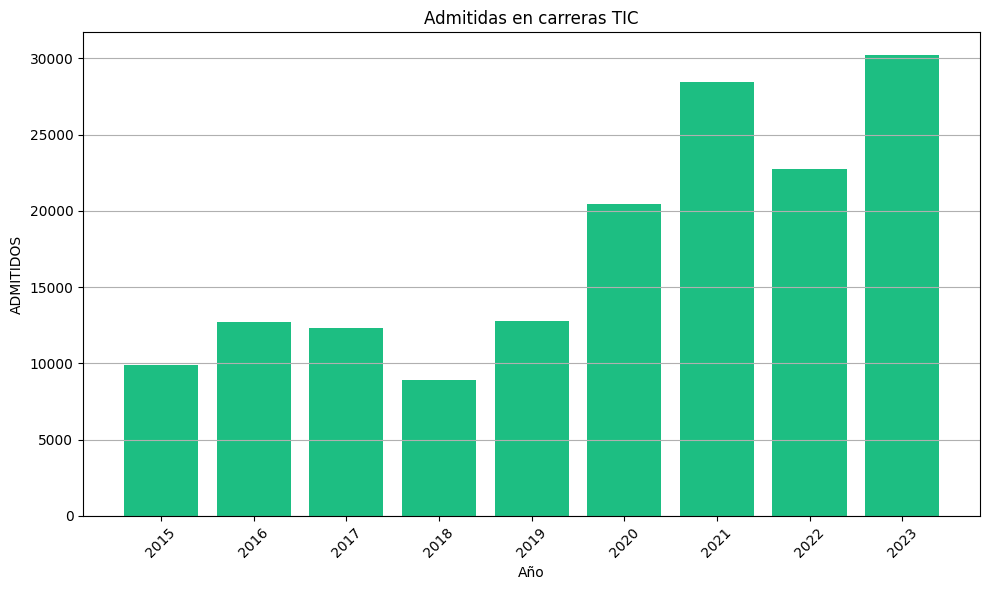

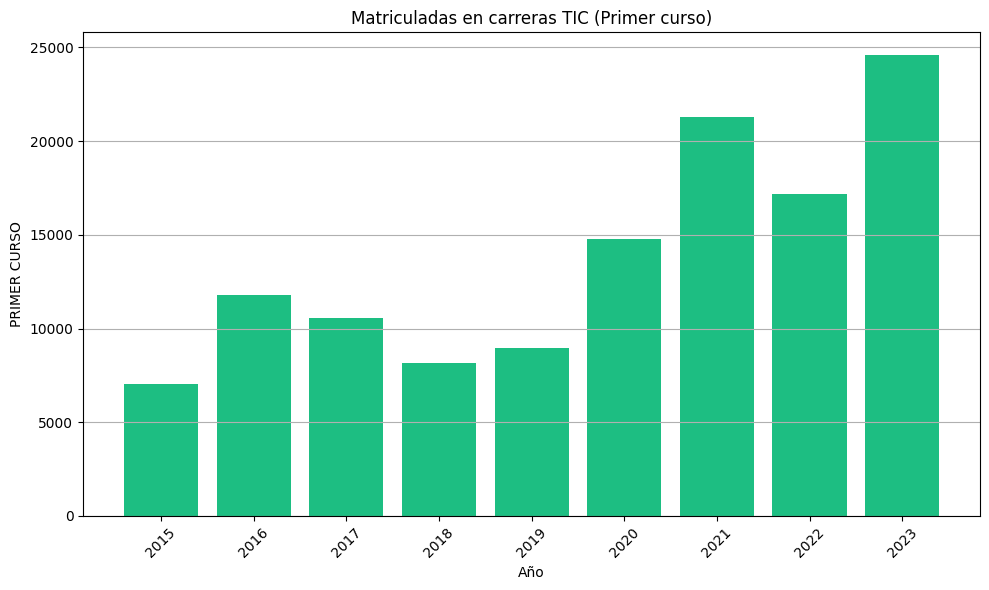

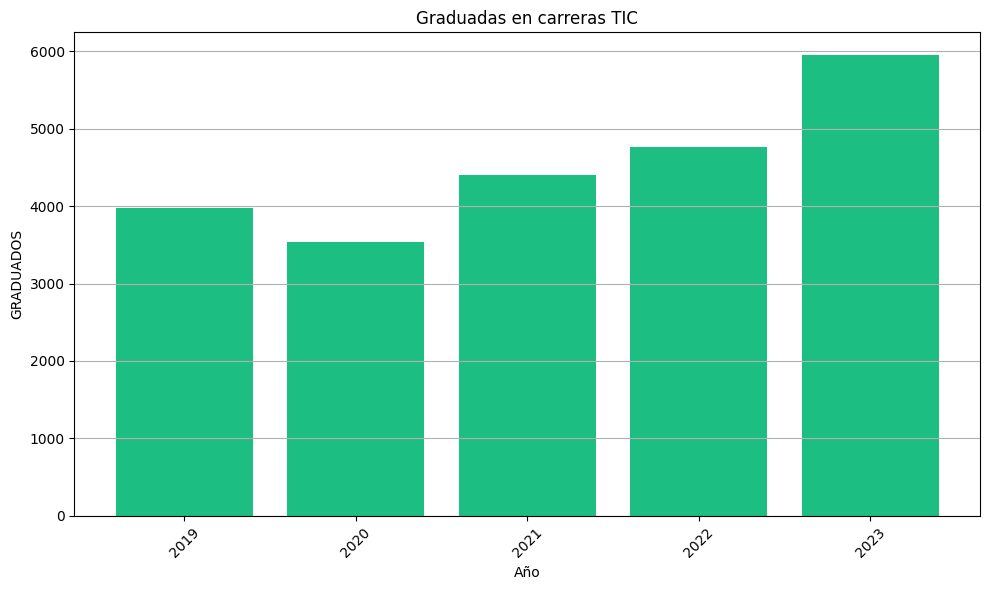

In [ ]:
# Visualizar
def graficar(df, columna, titulo):
    df_mujeres = df[df["SEXO"].str.lower().str.contains("femenino")]
    plt.figure(figsize=(10,6))
    plt.bar(df_mujeres["AÑO"], df_mujeres[columna], color="#1dbe82")
    plt.title(titulo)
    plt.xlabel("Año")
    plt.ylabel(columna)
    plt.xticks(df_mujeres["AÑO"], rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

graficar(admitidos_por_año, "ADMITIDOS", "Admitidas en carreras TIC")
graficar(matriculados_por_año, "PRIMER CURSO", "Matriculadas en carreras TIC (Primer curso)")
graficar(graduados_por_año, "GRADUADOS", "Graduadas en carreras TIC")


In [ ]:
# Análisis descriptivo

def resumen_genero(df, etapa):
    resumen = df.groupby(['AÑO', 'SEXO']).agg({etapa: 'sum'}).reset_index()
    pivot = resumen.pivot(index='AÑO', columns='SEXO', values=etapa)
    pivot['TOTAL'] = pivot.sum(axis=1)
    pivot['% MUJERES'] = (pivot.get('Femenino', 0) / pivot['TOTAL']) * 100
    return pivot

In [ ]:
resumen_admitidos = resumen_genero(df_admitidos, 'ADMITIDOS')
resumen_matriculados = resumen_genero(df_matriculados, 'PRIMER CURSO')
resumen_graduados = resumen_genero(df_graduados, 'GRADUADOS')

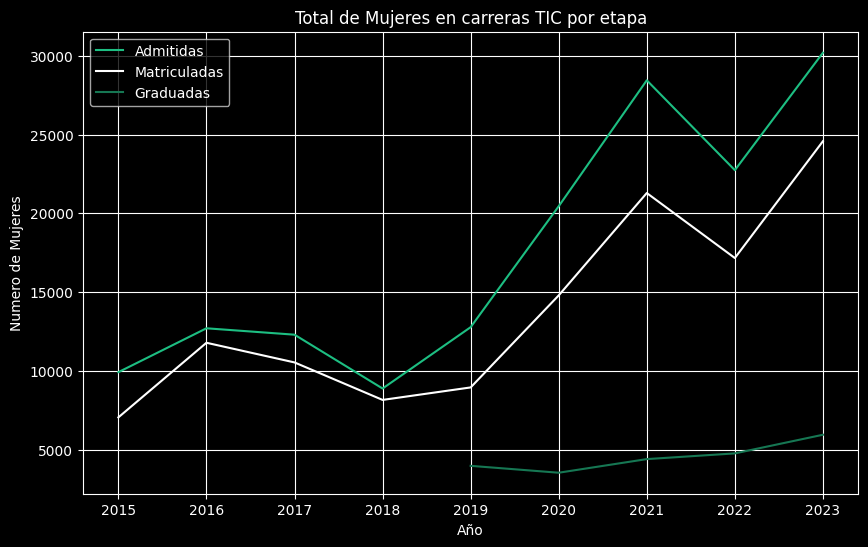

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(10,6))

plt.plot(resumen_admitidos.index, resumen_admitidos['Femenino'], label='Admitidas', color='#1dbe82')

plt.plot(resumen_matriculados.index, resumen_matriculados['Femenino'], label='Matriculadas', color='white')

plt.plot(resumen_graduados.index, resumen_graduados['Femenino'], label='Graduadas', color='#167753')


plt.title('Total de Mujeres en carreras TIC por etapa')
plt.xlabel('Año')
plt.ylabel('Numero de Mujeres')
plt.legend()
plt.grid(True)
plt.show()



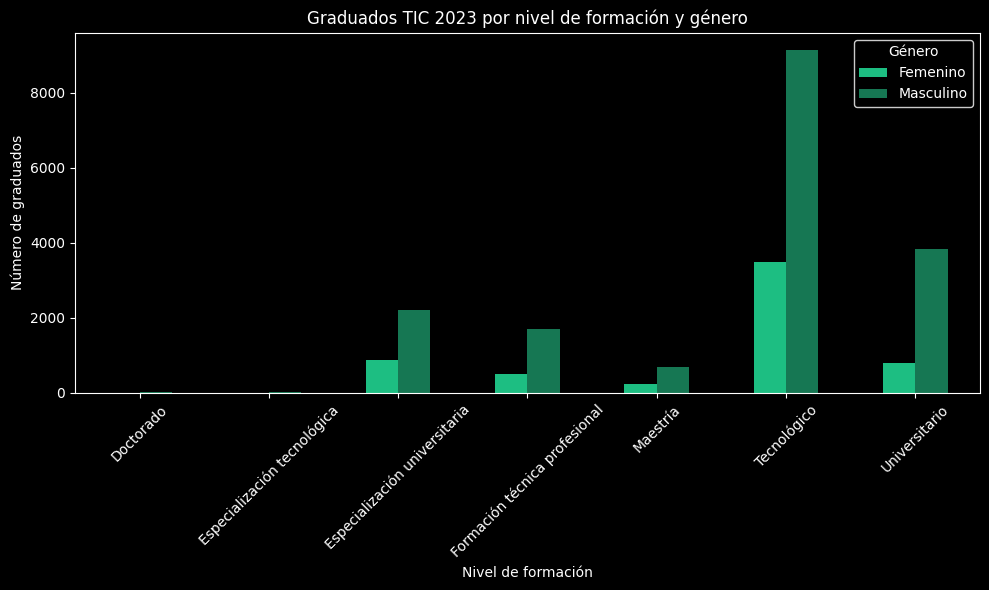

In [ ]:
# Graduadas TIC 2023
plt.style.use('dark_background')
niveles = df_graduados[df_graduados['AÑO'] == 2023]
niveles = niveles.groupby(['NIVEL DE FORMACIÓN', 'SEXO'])['GRADUADOS'].sum().unstack().fillna(0)

niveles.plot(kind='bar', figsize=(10,6), title='Graduados TIC 2023 por nivel de formación y género', color=['#1dbe82', '#167753'])
plt.xlabel('Nivel de formación', color='white')
plt.ylabel('Número de graduados',color='white')
plt.xticks(rotation=45,color= 'white')
plt.tight_layout()
plt.legend(title='Género', facecolor='black', edgecolor='white', labelcolor='white')

plt.show()

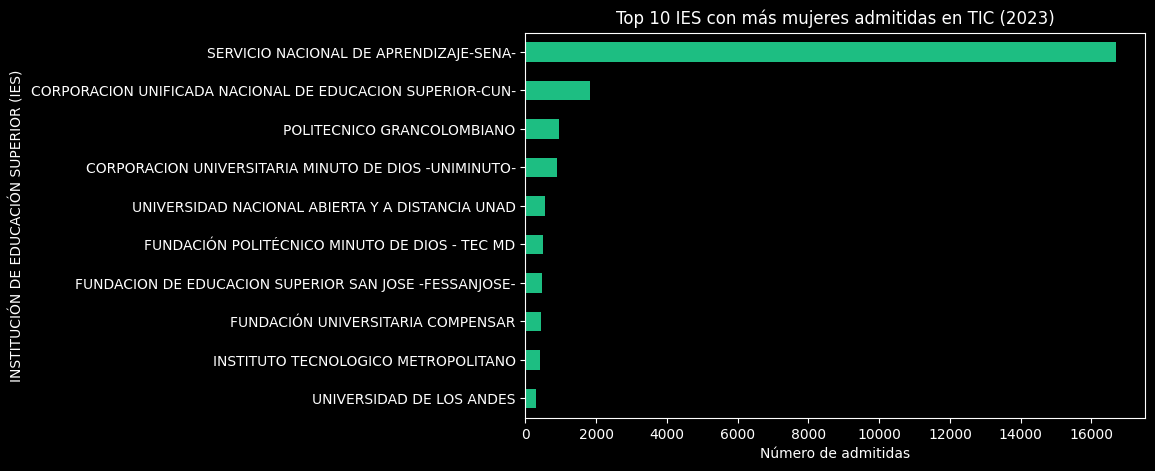

In [ ]:
# Top 10 IES con más mujeres en TIC
top_ies = df_admitidos[(df_admitidos['AÑO'] == 2023) & (df_admitidos['SEXO'] == 'Femenino')]
top_ies = top_ies.groupby('INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES)')['ADMITIDOS'].sum().sort_values(ascending=False).head(10)

top_ies.plot(kind='barh', title='Top 10 IES con más mujeres admitidas en TIC (2023)', figsize=(8,5), color='#1dbe82')
plt.xlabel('Número de admitidas')
plt.gca().invert_yaxis()
plt.show()

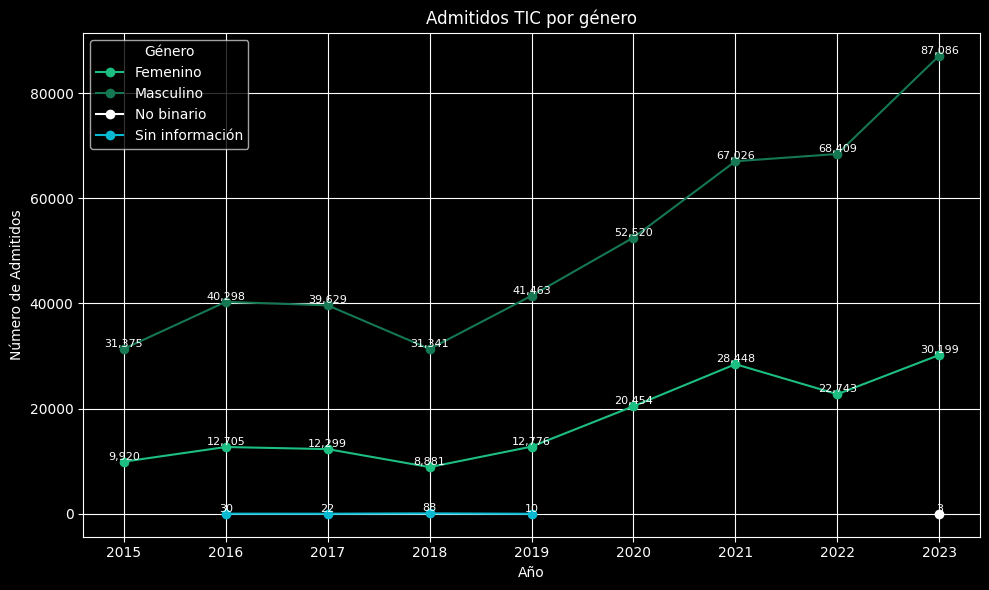

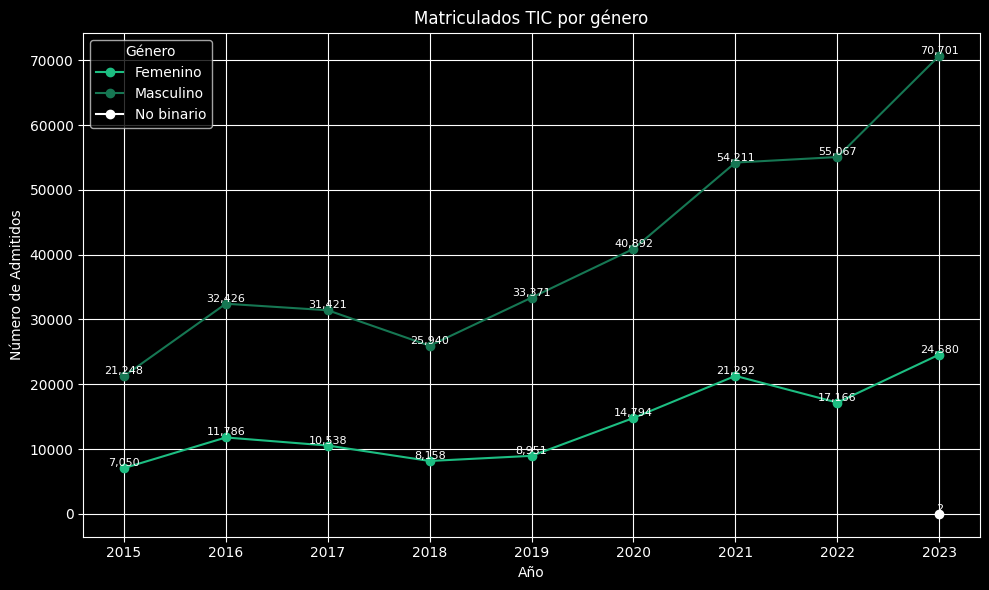

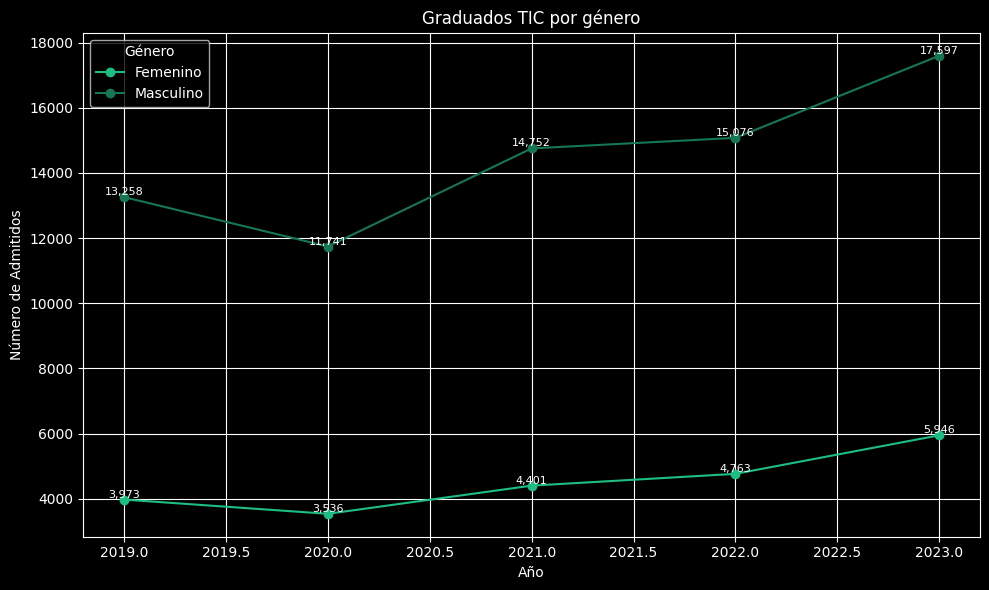

In [ ]:
# Admitidos
plt.figure(figsize=(10, 6))
admitidos = df_admitidos.groupby(['AÑO', 'SEXO'])['ADMITIDOS'].sum().unstack()
admitidos.plot(kind='line', marker='o', title='Admitidos TIC por género', color=['#1dbe82', '#167753','white','#09b9d2'], ax=plt.gca())

for sexo in admitidos.columns:
    for x, y in admitidos[sexo].items():
        if pd.notna(y):
            plt.text(x, y, f'{int(y):,}', ha='center', va='bottom', fontsize=8, color='white')

plt.xlabel('Año')
plt.ylabel('Número de Admitidos')
plt.grid(True)
plt.legend(title='Género')
plt.tight_layout()
plt.show()

# Matriculados
plt.figure(figsize=(10, 6))
matriculados = df_matriculados.groupby(['AÑO', 'SEXO'])['PRIMER CURSO'].sum().unstack()
matriculados.plot(kind='line', marker='o', title='Matriculados TIC por género', color=['#1dbe82', '#167753','white'], ax=plt.gca())

for sexo in matriculados.columns:
    for x, y in matriculados[sexo].items():
        if pd.notna(y):
            plt.text(x, y, f'{int(y):,}', ha='center', va='bottom', fontsize=8, color='white')

plt.xlabel('Año')
plt.ylabel('Número de Admitidos')
plt.grid(True)
plt.legend(title='Género')
plt.tight_layout()
plt.show()

# Graduados
plt.figure(figsize=(10, 6))
graduados = df_graduados.groupby(['AÑO', 'SEXO'])['GRADUADOS'].sum().unstack()
graduados.plot(kind='line', marker='o', title='Graduados TIC por género', color=['#1dbe82', '#167753'], ax=plt.gca())

for sexo in graduados.columns:
    for x, y in graduados[sexo].items():
        if pd.notna(y):
            plt.text(x, y, f'{int(y):,}', ha='center', va='bottom', fontsize=8, color='white')

plt.xlabel('Año')
plt.ylabel('Número de Admitidos')
plt.grid(True)
plt.legend(title='Género')
plt.tight_layout()
plt.show()

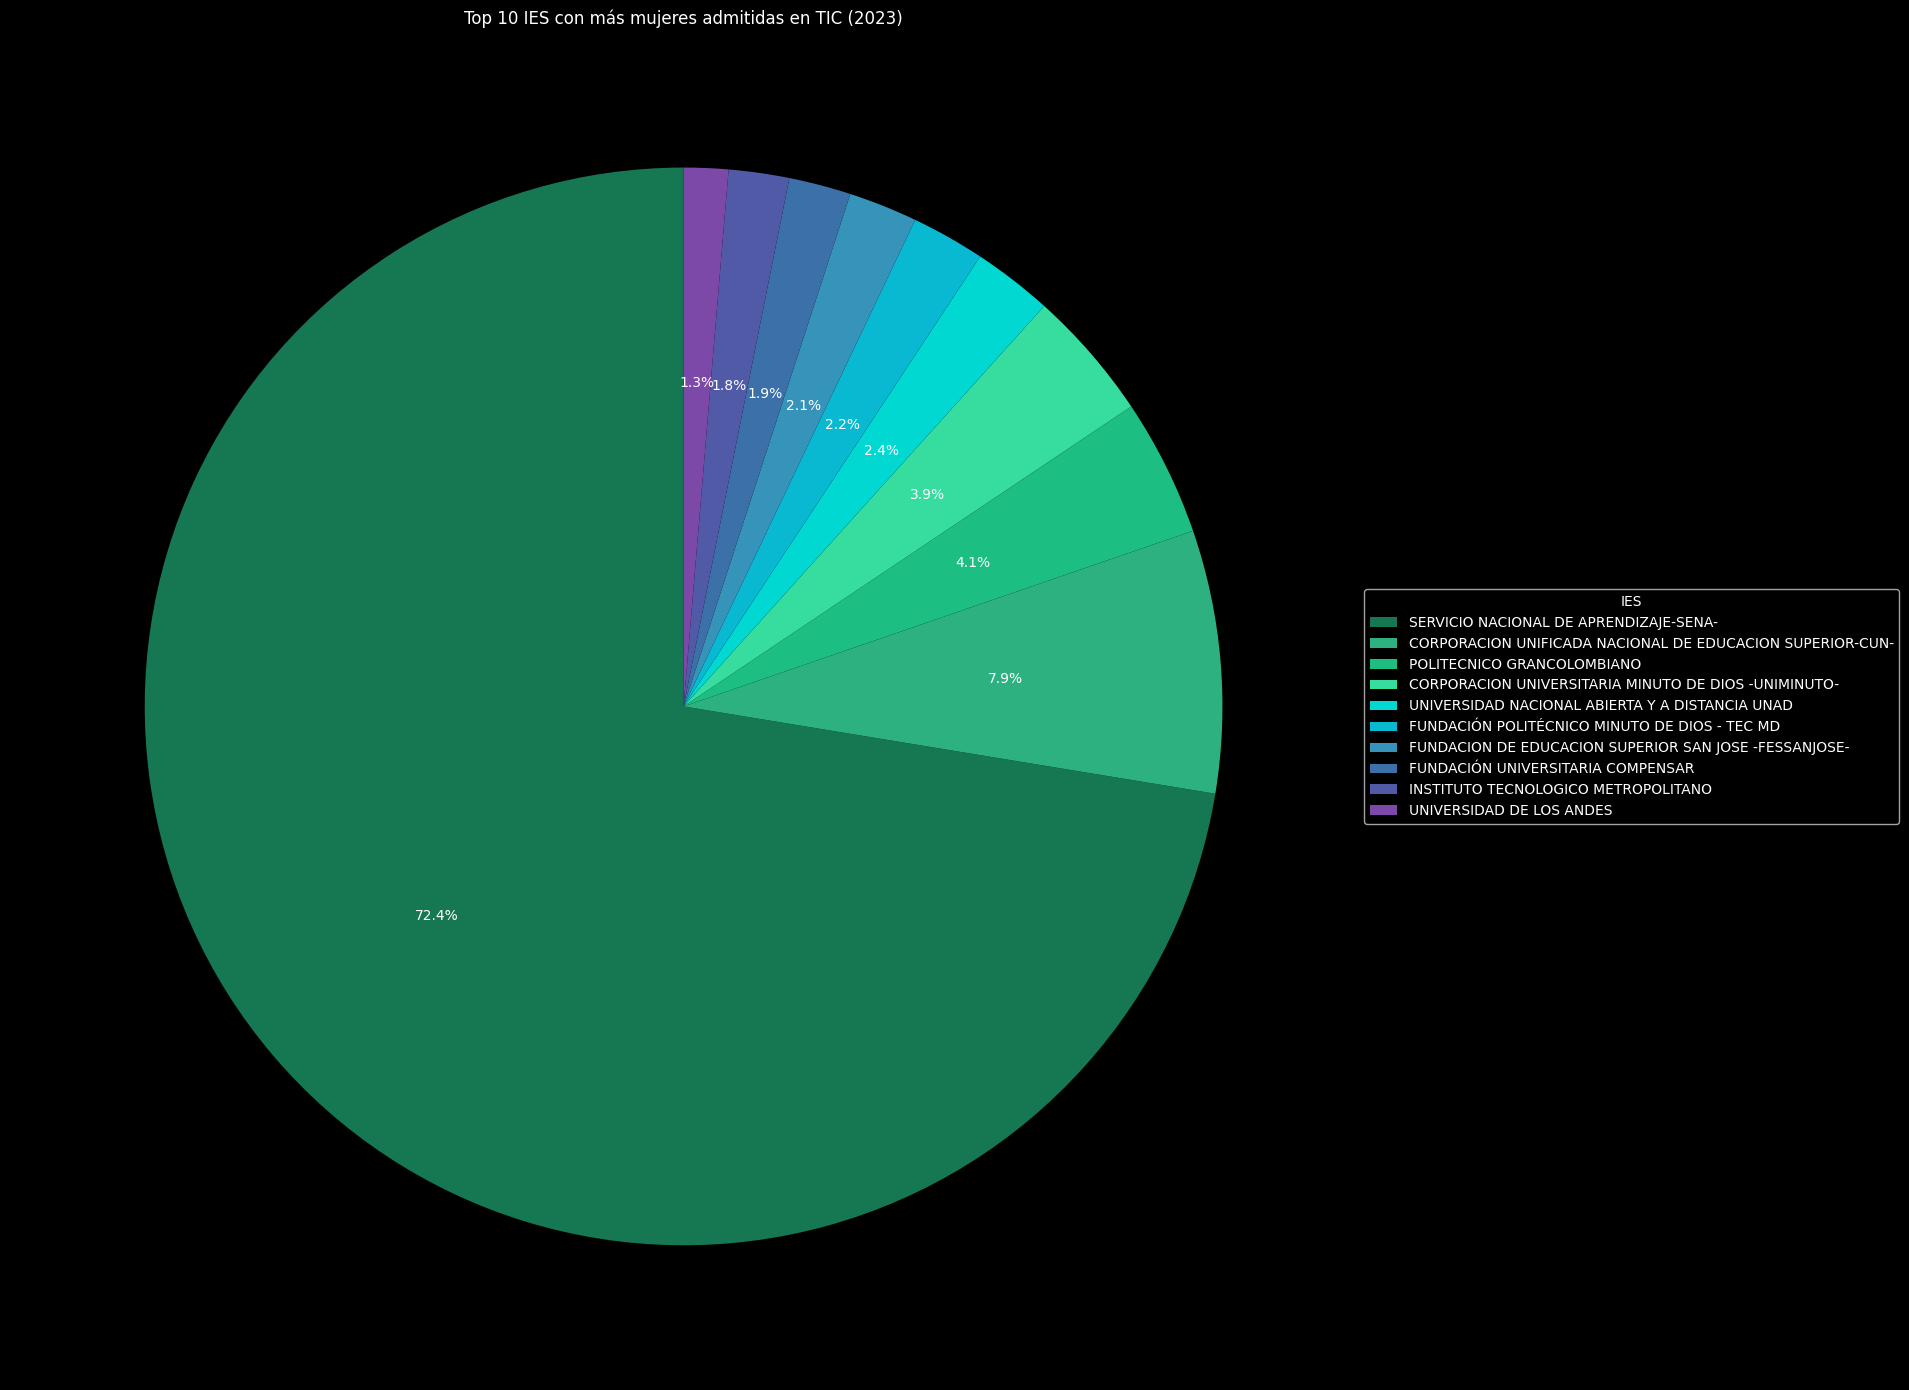

In [ ]:
# Filtrar top 10 IES con más mujeres admitidas en 2023
top_ies = df_admitidos[(df_admitidos['AÑO'] == 2023) & (df_admitidos['SEXO'] == 'Femenino')]
top_ies = top_ies.groupby('INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES)')['ADMITIDOS'].sum().sort_values(ascending=False).head(10)

# Tu paleta personalizada
colores = ['#167753', '#2db180', '#1dbe82', '#36dd9f', '#00d8d1',
           '#09b9d2', '#3694bb', '#3b71a8', '#505aa7', '#7c49a9']

# Crear figura
fig, ax = plt.subplots(figsize=(18, 14))

# Gráfico de torta
ax.pie(
    top_ies.values,
    labels=[''] * len(top_ies),
    autopct='%1.1f%%',
    startangle=90,
    colors=colores  # ← Aquí aplicamos tu paleta
)

# Leyenda con nombres de las IES
ax.legend(
    top_ies.index,
    title='IES',
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

# Título y mostrar
plt.title('Top 10 IES con más mujeres admitidas en TIC (2023)')
plt.tight_layout()
plt.show()

In [ ]:
print(df_graduados.columns.tolist())

['SEXO', 'ID CINE CAMPO AMPLIO', 'GRADUADOS', 'AÑO', 'NIVEL DE FORMACIÓN', 'INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES)', 'CÓDIGO DEL DEPARTAMENTO (PROGRAMA)', 'DEPARTAMENTO DE OFERTA DEL PROGRAMA']


<Axes: title={'center': 'Graduados TIC por género'}, xlabel='AÑO'>

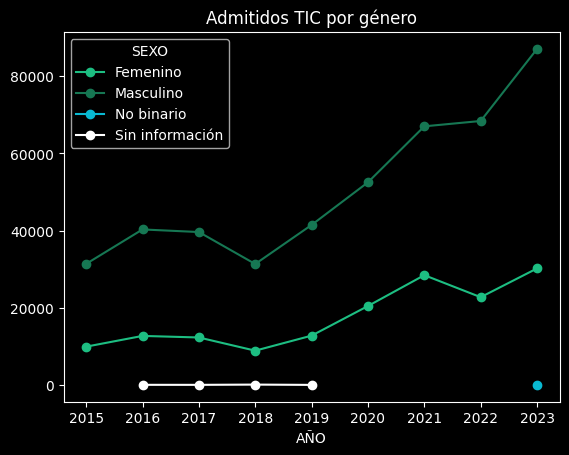

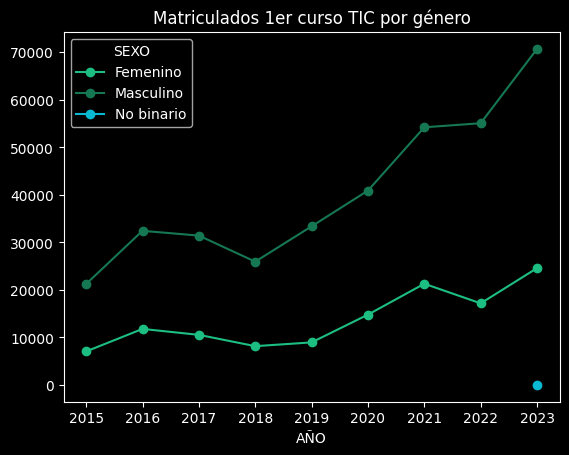

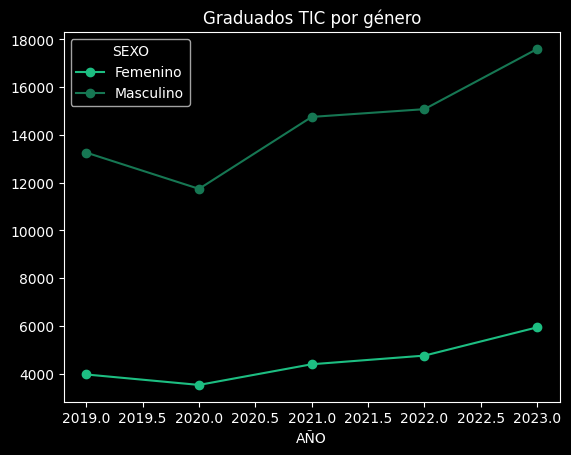

In [ ]:
# Brechas por genero en TIC
df_admitidos.groupby(['AÑO', 'SEXO'])['ADMITIDOS'].sum().unstack().plot(kind='line', marker='o', title='Admitidos TIC por género', color=['#1dbe82','#167753', '#09b9d2','white'])
df_matriculados.groupby(['AÑO', 'SEXO'])['PRIMER CURSO'].sum().unstack().plot(kind='line', marker='o', title='Matriculados 1er curso TIC por género', color=['#1dbe82','#167753','#09b9d2'])
df_graduados.groupby(['AÑO', 'SEXO'])['GRADUADOS'].sum().unstack().plot(kind='line', marker='o', title='Graduados TIC por género', color=['#1dbe82','#167753'])

<Axes: title={'center': '% de mujeres admitidas en TIC'}, xlabel='AÑO'>

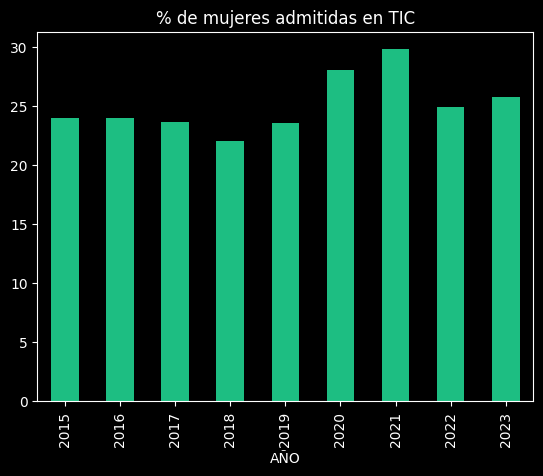

In [ ]:
# Porcentajes por año
admitidos_total = df_admitidos.groupby('AÑO')['ADMITIDOS'].sum()
admitidas_fem = df_admitidos[df_admitidos['SEXO'] == 'Femenino'].groupby('AÑO')['ADMITIDOS'].sum()
(admitidas_fem / admitidos_total * 100).plot(kind='bar', title='% de mujeres admitidas en TIC', color='#1dbe82')

<Axes: title={'center': 'Tasa de deserción femenina en carreras TIC'}, xlabel='AÑO'>

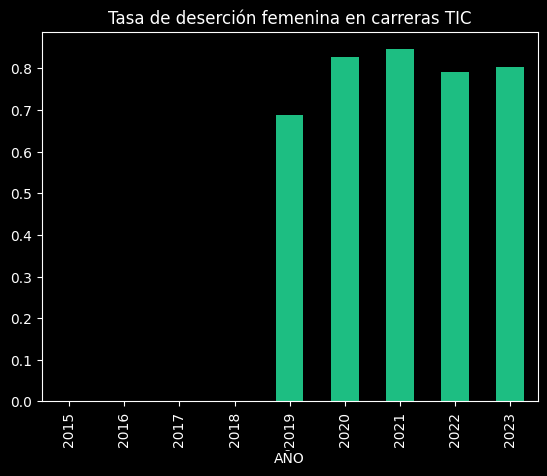

In [ ]:
# Estimación tasa de deserción por cohorte
mujeres_admitidas = df_admitidos[df_admitidos['SEXO'] == 'Femenino'].groupby('AÑO')['ADMITIDOS'].sum()
mujeres_graduadas = df_graduados[df_graduados['SEXO'] == 'Femenino'].groupby('AÑO')['GRADUADOS'].sum()

tasa_desercion = 1 - (mujeres_graduadas / mujeres_admitidas)
tasa_desercion.plot(kind='bar', title='Tasa de deserción femenina en carreras TIC', color='#1dbe82')

<Axes: title={'center': 'Ciclo de vida de mujeres en TIC'}, xlabel='AÑO'>

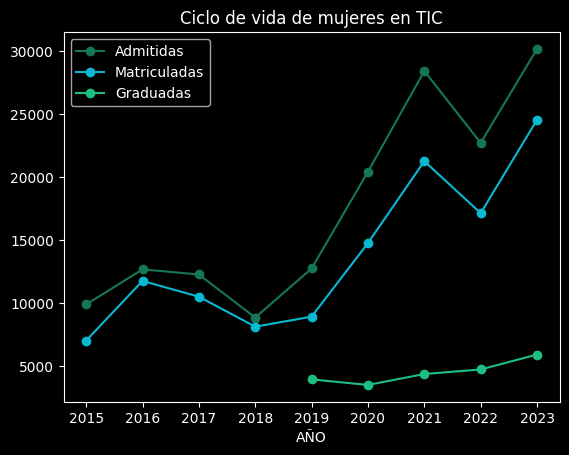

In [ ]:
# Ciclo de vidad del alumnado por genero
ciclo = pd.DataFrame({
    'Admitidas': df_admitidos[df_admitidos['SEXO'] == 'Femenino'].groupby('AÑO')['ADMITIDOS'].sum(),
    'Matriculadas': df_matriculados[df_matriculados['SEXO'] == 'Femenino'].groupby('AÑO')['PRIMER CURSO'].sum(),
    'Graduadas': df_graduados[df_graduados['SEXO'] == 'Femenino'].groupby('AÑO')['GRADUADOS'].sum()
})

ciclo.plot(kind='line', marker='o', title='Ciclo de vida de mujeres en TIC',color=['#167753','#09b9d2','#1dbe82'])

<Axes: title={'center': 'Tasa de deserción por nivel de formación'}, ylabel='NIVEL DE FORMACIÓN'>

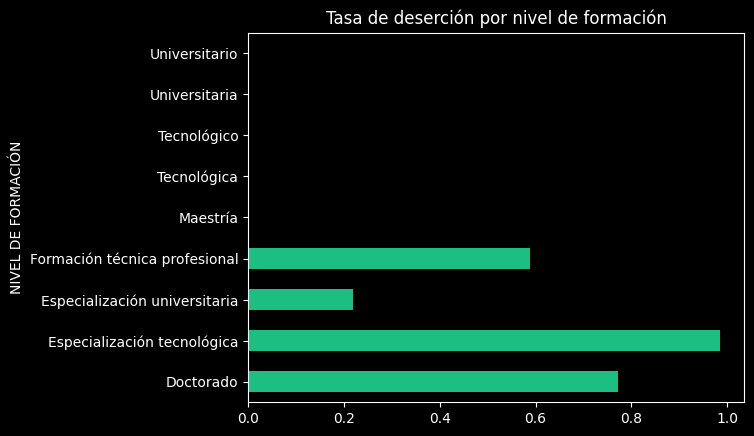

In [ ]:
# Identificar variables asociadas a la deserción
adm = df_admitidos[(df_admitidos['SEXO'] == 'Femenino') & (df_admitidos['AÑO'] == 2020)]
grad = df_graduados[(df_graduados['SEXO'] == 'Femenino') & (df_graduados['AÑO'] == 2023)]  # Suponiendo 3 años de duración promedio

adm_nivel = adm.groupby('NIVEL DE FORMACIÓN')['ADMITIDOS'].sum()
grad_nivel = grad.groupby('NIVEL DE FORMACIÓN')['GRADUADOS'].sum()

(1 - grad_nivel / adm_nivel).plot(kind='barh', title='Tasa de deserción por nivel de formación', color='#1dbe82')

In [ ]:
# Mapa por departamentos
def resumen_por_departamento(df, columna_valor, nombre_etapa):
    filtro = (df['SEXO'] == 'Femenino') & (df['ID CINE CAMPO AMPLIO'] == 6)
    resumen = df[filtro].groupby(['AÑO', 'DEPARTAMENTO DE OFERTA DEL PROGRAMA'])[columna_valor].sum().reset_index()
    resumen = resumen.rename(columns={
        'DEPARTAMENTO DE OFERTA DEL PROGRAMA': 'Departamento',
        columna_valor: nombre_etapa
    })
    return resumen

# Aplica la función a cada etapa
admitidas_dep = resumen_por_departamento(df_admitidos, 'ADMITIDOS', 'Admitidas')
matriculadas_dep = resumen_por_departamento(df_matriculados, 'PRIMER CURSO', 'Matriculadas')
graduadas_dep = resumen_por_departamento(df_graduados, 'GRADUADOS', 'Graduadas')

# Combinar todos los datos
df_mapa = admitidas_dep.merge(matriculadas_dep, on=['AÑO', 'Departamento'], how='outer')
df_mapa = df_mapa.merge(graduadas_dep, on=['AÑO', 'Departamento'], how='outer')
df_mapa = df_mapa.fillna(0)

In [ ]:
df_admitidos['DEPARTAMENTO DE OFERTA DEL PROGRAMA']

,DEPARTAMENTO DE OFERTA DEL PROGRAMA
0,"Bogotá, D.C."
1,"Bogotá, D.C."
2,"Bogotá, D.C."
3,"Bogotá, D.C."
4,"Bogotá, D.C."
...,...
17226,"Bogotá, D.C."
17227,"Bogotá, D.C."
17228,"Bogotá, D.C."
17229,"Bogotá, D.C."


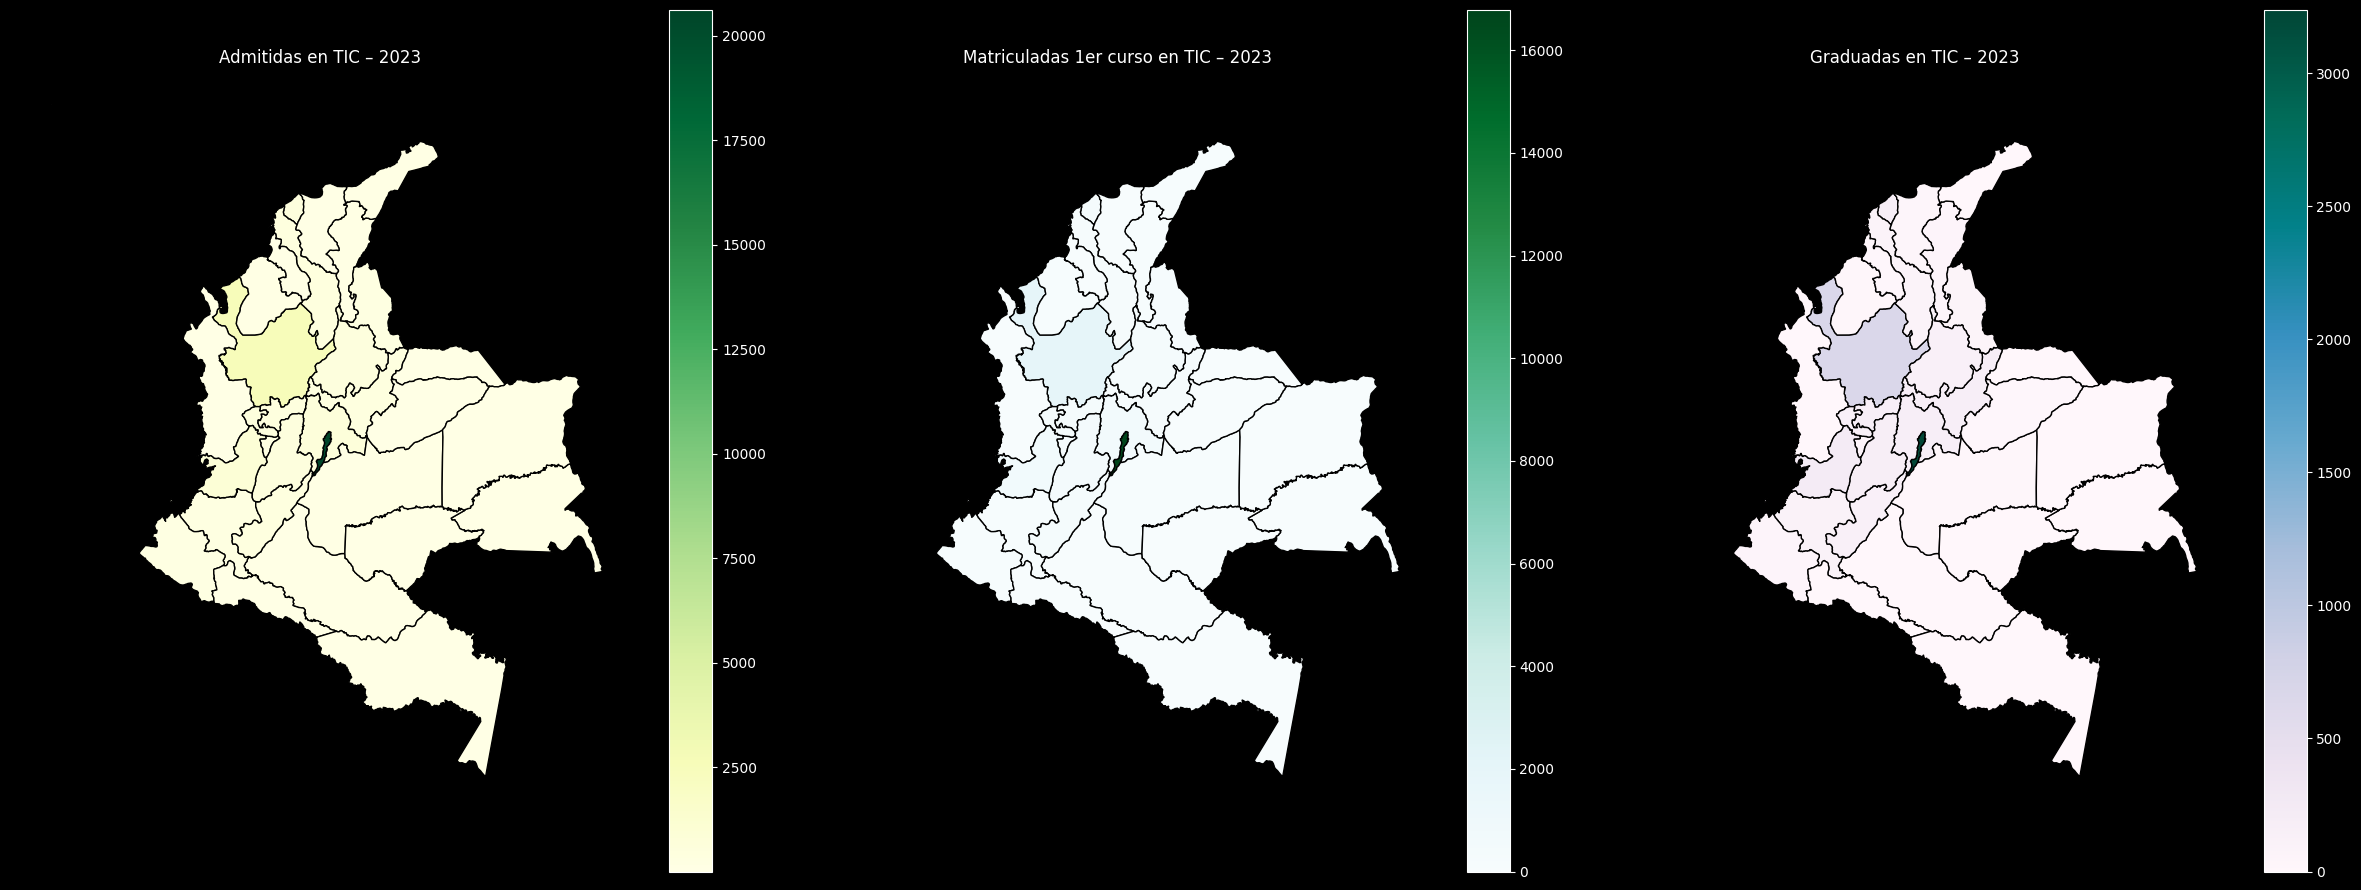

In [ ]:
gdf = gpd.read_file("/content/sample_data/depto.json")  # Ruta al archivo subido

# 2. Validar columna con código de departamento (probablemente sea esta)
gdf['DPTO'] = gdf['DPTO'].astype(int)  # Asegura que sea int

# 3. Prepara tus datos para admitidas, matriculadas y graduadas
def preparar_etapa(df, columna_valor, nombre_columna):
    df_filtrado = df[(df['SEXO'] == 'Femenino') & (df['ID CINE CAMPO AMPLIO'] == 6)]
    df_agg = df_filtrado.groupby(['AÑO', 'CÓDIGO DEL DEPARTAMENTO (PROGRAMA)'])[columna_valor] \
                        .sum().reset_index()
    df_agg['CÓDIGO'] = df_agg['CÓDIGO DEL DEPARTAMENTO (PROGRAMA)'].astype(int)
    df_agg = df_agg.rename(columns={columna_valor: nombre_columna})
    return df_agg

admitidas = preparar_etapa(df_admitidos, 'ADMITIDOS', 'Admitidas')
matriculadas = preparar_etapa(df_matriculados, 'PRIMER CURSO', 'Matriculadas')
graduadas = preparar_etapa(df_graduados, 'GRADUADOS', 'Graduadas')

# 4. Unir por año y código de departamento
df_total = admitidas.merge(matriculadas, on=['AÑO', 'CÓDIGO'], how='outer') \
                    .merge(graduadas, on=['AÑO', 'CÓDIGO'], how='outer') \
                    .fillna(0)

# 5. Selecciona año a graficar (ejemplo: 2023)
año = 2023

df_año = df_total[df_total['AÑO'] == año]

# 6. Unir con el GeoDataFrame
mapa = gdf.merge(df_año, left_on='DPTO', right_on='CÓDIGO', how='left')

# 7. Colores personalizados
colores = ['#167753', '#2db180', '#1dbe82', '#36dd9f', '#00d8d1',
           '#09b9d2', '#3694bb', '#3b71a8', '#505aa7', '#7c49a9']

# 8. Graficar mapas para cada etapa
fig, axes = plt.subplots(1, 3, figsize=(24, 9))

mapa.plot(column='Admitidas', cmap='YlGn', legend=True, ax=axes[0], edgecolor='black')
axes[0].set_title(f'Admitidas en TIC – {año}')
axes[0].axis('off')

mapa.plot(column='Matriculadas', cmap='BuGn', legend=True, ax=axes[1], edgecolor='black')
axes[1].set_title(f'Matriculadas 1er curso en TIC – {año}')
axes[1].axis('off')

mapa.plot(column='Graduadas', cmap='PuBuGn', legend=True, ax=axes[2], edgecolor='black')
axes[2].set_title(f'Graduadas en TIC – {año}')
axes[2].axis('off')

plt.tight_layout()
plt.show()